# QCTO - Workplace Module

### Project Title: Exploring Hass Avocado Market Trends: A Data-Driven Analysis of Sales and Pricing (2015-2023)
#### Done By: Michael Thema

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

The purpose of this project is to analyze the sales and pricing trends of Hass avocados in the United States from 2015 to 2023. The project aims to provide insights into how various factors, such as seasonality, regional differences, and economic conditions, influence avocado prices and sales volumes. By understanding these dynamics, the project seeks to help stakeholders—such as producers, retailers, and consumers—make more informed decisions regarding avocado pricing strategies, inventory management, and market expansion.

Goals

The specific goals of the project include:

**Trend Analysis:** Examine historical trends in avocado prices and sales volumes over the given period, identifying patterns that may be linked to seasonal or regional factors.

**Regional Comparison:** Compare avocado market dynamics across different regions to understand how local conditions affect pricing and sales.

**Predictive Modeling:** Develop models to forecast future avocado prices and sales volumes, aiding in planning and decision-making.

**Impact Assessment:** Assess the impact of external factors, such as economic changes or shifts in consumer preferences, on the avocado market.

Understanding the factors that influence the avocado market is critical for several reasons:

**Market Stability:** Producers and retailers can use the insights from this analysis to stabilize their supply chains, avoiding potential losses due to unexpected price fluctuations or supply shortages.

**Consumer Insights:** By understanding the pricing trends and demand dynamics, consumers can make more informed purchasing decisions, potentially leading to cost savings.

**Strategic Planning:** The findings from this project can assist in long-term strategic planning for stakeholders in the avocado industry, including decisions on where to focus marketing efforts or when to adjust pricing strategies.

## GITHUB REPO
[Click here to view the project repo](https://github.com/MichaelThema/Avacado-Prices.git)

## Project Trello Board
[Click here to view the Trello board](https://trello.com/invite/b/66e85b8f867edb1344587d3e/ATTI3e824bbd51631c2c55a03c6d47c69eae09F6EFA3/project-avacado-prices)



---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
# Importing essential packages for data manipulation, visualization, and modeling

import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns      # For statistical data visualization

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression     # For building linear regression models
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance

import statsmodels.api as sm  # For advanced statistical modeling, including time series analysis
from datetime import datetime  # For handling date and time data

# Setting the visual style for the plots
sns.set(style="whitegrid")

# Display a message to confirm that packages are imported
print("Packages successfully imported!")

Packages successfully imported!


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

The avocado dataset used for this analysis was sourced from publicly available repositories, specifically from Kaggle, and was originally compiled from retail market data. The data likely comes from point-of-sale systems and market tracking tools that monitor avocado prices and sales volumes across different regions in the United States.

The dataset consists of 53,415 rows with both numerical and categorical data. Key numerical variables include AveragePrice, TotalVolume, and sales figures for different avocado types and bag sizes. Categorical data includes variables like region and type (conventional or organic).

Overall, the dataset provides a comprehensive view of avocado sales over time, enabling detailed analysis of pricing trends and market behavior across various regions and avocado types.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

The following code loads the avocado dataset and displays the first few rows, providing an overview of what the raw data looks like.

In [2]:
# Load the dataset
file_path = 'Avocado_HassAvocadoBoard_20152023v1.0.1.csv'
avocado_data = pd.read_csv(file_path)

# Display basic information about the dataset
print(avocado_data.info())

# Show the first few rows of the dataset
print(avocado_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB
None
         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2

In [3]:
avocado_data

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.790000,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.760000,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.080000,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...
53410,2023-12-03,1.550513,5693.91,204.64,1211.25,0.00,4278.03,NaN,NaN,NaN,organic,Toledo
53411,2023-12-03,1.703920,343326.10,66808.44,132075.11,58.65,138830.45,NaN,NaN,NaN,organic,West
53412,2023-12-03,1.618931,34834.86,15182.42,1211.38,0.00,18075.66,NaN,NaN,NaN,organic,WestTexNewMexico
53413,2023-12-03,1.245406,2942.83,1058.54,7.46,0.00,1779.19,NaN,NaN,NaN,organic,Wichita


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

Before we analyze the avocado data, we need to clean it up. This means fixing any issues in the dataset, like filling in missing information, removing incorrect data, and making sure everything is in a consistent format. This will help us get accurate insights from the data.

In [4]:
# Check for missing values
print("Missing values in each column:")
print(avocado_data.isnull().sum())

Missing values in each column:
Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64


We first looked at the dataset to see if there were any gaps or missing information. We found that some columns (like the number of small, large, and extra-large avocado bags) had missing values.

We filled these missing values with zeros, assuming that when the data was missing, no bags were sold in those sizes.

In [5]:
# Filling missing values with zeros
avocado_data_filled = avocado_data.fillna({'SmallBags': 0, 'LargeBags': 0, 'XLargeBags': 0})

print(f"Dataset shape after filling missing values with zeros: {avocado_data_filled.shape}")

Dataset shape after filling missing values with zeros: (53415, 12)


In [6]:
numerical_cols = avocado_data_filled.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

In [7]:
# Filter the rows that are not outliers
avocado_data_filtered = avocado_data_filled[~((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Dataset shape after removing outliers: {avocado_data_filtered.shape}")

Dataset shape after removing outliers: (30506, 12)



Outliers are extreme values that don't match the typical data. These values can sometimes distort our analysis, so we check for them and remove them if necessary.

We removed any rows that had unusual values using a method that focuses on finding values that are far from the usual range (called the Interquartile Range or IQR). This reduced the number of rows significantly, which means there were many extreme values.

In [8]:
# Check for incorrect values (e.g., negative prices or volumes)
invalid_rows = avocado_data_filtered[(avocado_data_filtered['AveragePrice'] < 0) | (avocado_data_filtered['TotalVolume'] < 0)]
print("Rows with invalid values (negative prices/volumes):")
print(invalid_rows)

# Remove rows with invalid values
avocado_data_filtered = avocado_data_filtered[(avocado_data_filtered['AveragePrice'] >= 0) & (avocado_data_filtered['TotalVolume'] >= 0)]


Rows with invalid values (negative prices/volumes):
Empty DataFrame
Columns: [Date, AveragePrice, TotalVolume, plu4046, plu4225, plu4770, TotalBags, SmallBags, LargeBags, XLargeBags, type, region]
Index: []



We made sure there were no impossible values, like negative prices or negative sales volumes (since we can't sell negative amounts of avocados).

Fortunately, there were no such errors in our dataset, so we didn't need to remove any rows based on this.

In [9]:
# Filter data based on a specific condition
# filter to only focus on conventional avocado sales
avocado_data_conventional = avocado_data_filtered[avocado_data_filtered['type'] == 'conventional']

# Display information about the final cleaned dataset
print(avocado_data_conventional.info())
print(avocado_data_conventional.head())


<class 'pandas.core.frame.DataFrame'>
Index: 8144 entries, 0 to 53354
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8144 non-null   object 
 1   AveragePrice  8144 non-null   float64
 2   TotalVolume   8144 non-null   float64
 3   plu4046       8144 non-null   float64
 4   plu4225       8144 non-null   float64
 5   plu4770       8144 non-null   float64
 6   TotalBags     8144 non-null   float64
 7   SmallBags     8144 non-null   float64
 8   LargeBags     8144 non-null   float64
 9   XLargeBags    8144 non-null   float64
 10  type          8144 non-null   object 
 11  region        8144 non-null   object 
dtypes: float64(9), object(3)
memory usage: 827.1+ KB
None
          Date  AveragePrice  TotalVolume    plu4046   plu4225  plu4770  \
0   2015-01-04          1.22     40873.28    2819.50  28287.42    49.90   
6   2015-01-04          1.01     80034.32   44562.12  24964.23  2752.35   
78  2015-01


To narrow down our focus, we filtered the data to only look at "conventional" avocados, excluding "organic" avocados.

We filtered the dataset to show only the sales of conventional avocados. This reduced the dataset further to focus on what's relevant.

In [10]:
# Ensure 'Date' column is converted to datetime
avocado_data_filtered.loc[:, 'Date'] = pd.to_datetime(avocado_data_filtered['Date'])

# Filter for a specific region, e.g., 'California'
avocado_data_filtered_region = avocado_data_filtered[avocado_data_filtered['region'] == 'California']

# Filter for a specific time range, e.g., after '2020-01-01'
# convert the string '2020-01-01' to a datetime object for comparison
avocado_data_filtered_region = avocado_data_filtered_region[avocado_data_filtered_region['Date'] >= pd.to_datetime('2020-01-01')]

# Display the results
print(avocado_data_filtered_region.info())
print(avocado_data_filtered_region.head())

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 29240 to 53363
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          157 non-null    object 
 1   AveragePrice  157 non-null    float64
 2   TotalVolume   157 non-null    float64
 3   plu4046       157 non-null    float64
 4   plu4225       157 non-null    float64
 5   plu4770       157 non-null    float64
 6   TotalBags     157 non-null    float64
 7   SmallBags     157 non-null    float64
 8   LargeBags     157 non-null    float64
 9   XLargeBags    157 non-null    float64
 10  type          157 non-null    object 
 11  region        157 non-null    object 
dtypes: float64(9), object(3)
memory usage: 15.9+ KB
None
                      Date  AveragePrice  TotalVolume   plu4046   plu4225  \
29240  2020-01-06 00:00:00      1.779792    251868.12  21565.76  14176.89   
29358  2020-01-12 00:00:00      1.862071    244015.05  25645.80  14060.85   
294


Next, we focused on avocado sales in California after January 2020. This helps us analyze how prices and sales volumes changed over time in a specific area.

We filtered the data to include only the sales from California and only for the period after January 1, 2020.

In [11]:
# Check for duplicate rows
duplicate_rows = avocado_data_filtered_region.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Remove duplicates if any
avocado_data_filtered_region = avocado_data_filtered_region.drop_duplicates()


Number of duplicate rows: 0



Sometimes the same data can appear more than once by mistake. We checked to see if there were any duplicate rows.

Luckily, there were no duplicates in the dataset, so we didn’t have to remove any rows.

In [12]:
# Example: Standardize 'region' column to lowercase and strip whitespace
avocado_data_filtered_region['region'] = avocado_data_filtered_region['region'].str.lower().str.strip()



To make sure everything is consistent, we standardized how the region names were written. For example, we ensured that all region names were in the same format (e.g., making sure "california" was written consistently as "California").

We cleaned up the region names to ensure they were consistently formatted. This helps avoid errors later on.

In [13]:
# Example: If 'region' column contains inconsistent labels, replace them
avocado_data_filtered_region['region'] = avocado_data_filtered_region['region'].replace({
    'california': 'California'
})


In [14]:
# Convert 'Date' to datetime if not already done
avocado_data_filtered_region['Date'] = pd.to_datetime(avocado_data_filtered_region['Date'])

# Check if all columns have appropriate data types
print(avocado_data_filtered_region.dtypes)


Date            datetime64[ns]
AveragePrice           float64
TotalVolume            float64
plu4046                float64
plu4225                float64
plu4770                float64
TotalBags              float64
SmallBags              float64
LargeBags              float64
XLargeBags             float64
type                    object
region                  object
dtype: object


Finally, we made sure that each column had the correct format. For example, dates should be recognized as dates, numbers should be treated as numbers, and text should remain text.

We confirmed that all the columns had the correct data type, especially ensuring that the date column was recognized as a proper date format.

In [15]:
avocado_data_filtered_region.to_csv('cleaned_avocado_data.csv', index=False)


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [16]:
# Perform descriptive statistics
descriptive_stats = avocado_data.describe()

# Display the descriptive statistics
# Removed the import for ace_tools as it is not a standard library and caused the ModuleNotFoundError
# Instead, use the display function to show the descriptive statistics
display(descriptive_stats)

# You can print or inspect the descriptive statistics as well
print(descriptive_stats)

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,53415.000000,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,4.102500e+04,4.102500e+04,41025.000000
mean,1.428910,8.694474e+05,2.982707e+05,2.222170e+05,2.053195e+04,2.175083e+05,1.039222e+05,2.331316e+04,2731.811796
std,0.393116,3.545274e+06,1.307669e+06,9.554624e+05,1.040977e+05,8.676947e+05,5.692608e+05,1.496622e+05,22589.096454
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.119091,1.626465e+04,6.947250e+02,2.120800e+03,0.000000e+00,7.846520e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.400000,1.203525e+05,1.458058e+04,1.751663e+04,9.005000e+01,3.695310e+04,6.945800e+02,0.000000e+00,0.000000
75%,1.690000,4.542380e+05,1.287924e+05,9.351560e+04,3.599735e+03,1.110146e+05,3.795298e+04,2.814920e+03,0.000000
max,3.440830,6.103446e+07,2.544720e+07,2.047057e+07,2.860025e+06,1.629830e+07,1.256716e+07,4.324231e+06,679586.800000


       AveragePrice   TotalVolume       plu4046       plu4225       plu4770  \
count  53415.000000  5.341500e+04  5.341500e+04  5.341500e+04  5.341500e+04   
mean       1.428910  8.694474e+05  2.982707e+05  2.222170e+05  2.053195e+04   
std        0.393116  3.545274e+06  1.307669e+06  9.554624e+05  1.040977e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.119091  1.626465e+04  6.947250e+02  2.120800e+03  0.000000e+00   
50%        1.400000  1.203525e+05  1.458058e+04  1.751663e+04  9.005000e+01   
75%        1.690000  4.542380e+05  1.287924e+05  9.351560e+04  3.599735e+03   
max        3.440830  6.103446e+07  2.544720e+07  2.047057e+07  2.860025e+06   

          TotalBags     SmallBags     LargeBags     XLargeBags  
count  5.341500e+04  4.102500e+04  4.102500e+04   41025.000000  
mean   2.175083e+05  1.039222e+05  2.331316e+04    2731.811796  
std    8.676947e+05  5.692608e+05  1.496622e+05   22589.096454  
min    0.000000e+00  0.00000

**Summary of Descriptive Statistics for Avocado Data**

Average Price:

The average price of avocados is 1.43, with a range from 0.44 to 3.44, indicating moderate price variation.

Total Volume:

The average total volume of sales is 869,447 units, with significant variability. The volume ranges from 85 units to over 61 million units, showing substantial fluctuations in sales.

PLU Codes:
The PLU code plu4046 has the highest mean sales volume (298,270 units), while plu4225 and plu4770follow, reflecting consumer preferences for certain avocado types.

Bag Sizes:
Small Bags dominate sales with an average of 103,922 units, much higher than Large Bags and XLarge Bags. This shows a strong preference for smaller purchase quantities.

Key Insights:
Price and volume vary significantly, suggesting potential influences like seasonality or region.
Small Bags are the most popular product, and there are several zero-value entries for larger bag sizes, indicating limited availability or demand in some areas.

Actionable Insights:
Further analysis of pricing strategies and sales trends can help optimize stock and pricing.
Investigating correlations between price and sales volume, along with time-based trends, may yield deeper insights into consumer behavior and market dynamics.



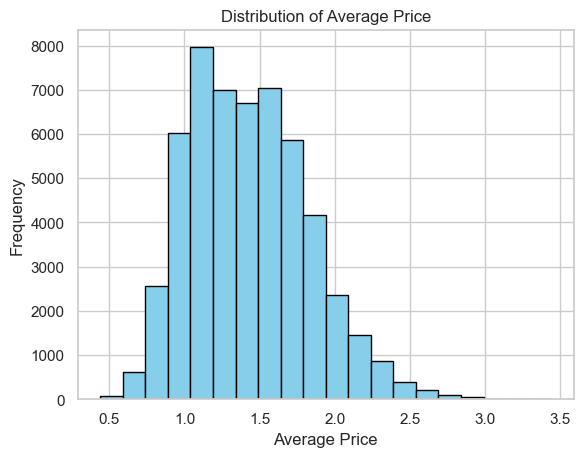

In [17]:
import matplotlib.pyplot as plt

# Replace 'column_name' with the actual column you want to plot, e.g., 'AveragePrice'
plt.hist(avocado_data['AveragePrice'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()


Insights:

Normal Distribution: The average price shows a bell-shaped, approximately normal distribution centered around $1.0 to $1.5. This suggests that avocado prices tend to cluster around this range, with few extreme high or low prices.

Moderate Spread: The prices range from about $0.5 to $3.5, with the majority of prices between $1.0 and $2.0. The moderate spread in prices could indicate that while the market is generally stable, certain factors like regional differences or seasonal changes lead to some price fluctuations.

Higher Frequency at the Median Price: The peak of the histogram around $1.0 to $1.2 suggests that this is the most common price range for avocados, which could represent the market equilibrium for this product.


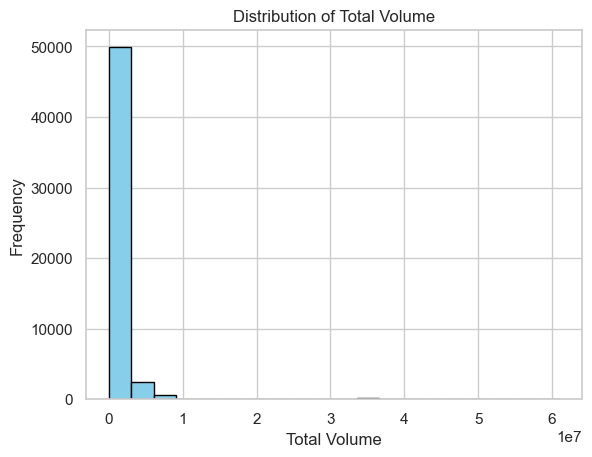

In [18]:
import matplotlib.pyplot as plt

# Replace 'column_name' with the actual column you want to plot, e.g., 'TotalVolume'
plt.hist(avocado_data['TotalVolume'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.show()


Insights:

Highly Skewed Distribution: The distribution of total volume is highly right-skewed, with the majority of values concentrated on the lower end of the scale. Most sales volumes are relatively small, and very few instances have extremely high total volumes.

Outliers: A small number of observations have significantly higher total volumes, visible in the right tail of the distribution. These outliers could represent unusually large transactions, possibly driven by specific retailers or regional demands during peak periods.

General Sales Pattern: The skewed nature of the data indicates that small-volume sales dominate the market, which may suggest a fragmented market with many small-scale purchases or a majority of small retailers.


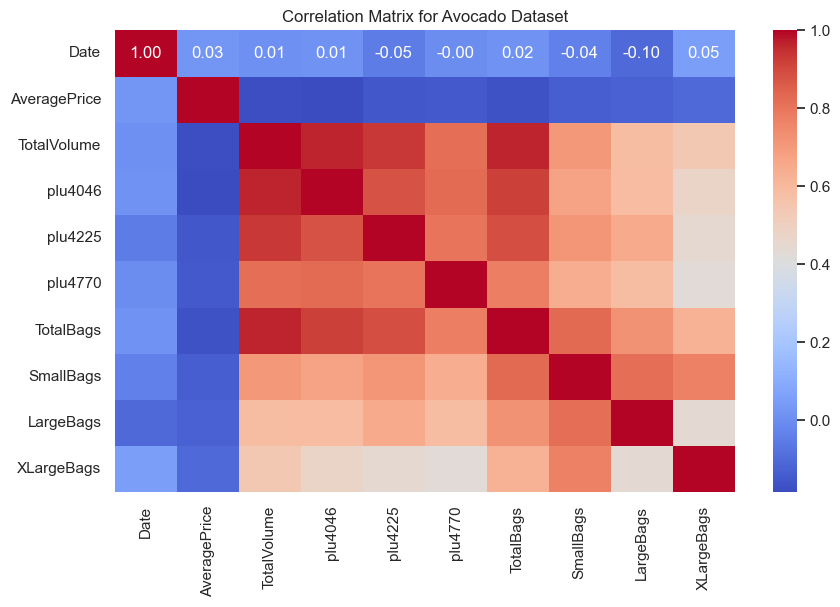

In [19]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to numeric representation
# (e.g., days since the start date)
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])
avocado_data['Date'] = (avocado_data['Date'] - avocado_data['Date'].min()).dt.days

# Select only numeric columns for correlation analysis
numeric_data = avocado_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Avocado Dataset')
plt.show()

Insights:

Negative correlation with AveragePrice: AveragePrice has a moderate negative correlation with TotalVolume(-0.18), plu4046 (-0.18), and other PLU codes, indicating that higher prices tend to be associated with lower sales volumes.

High correlation within sales volume variables: TotalVolume is highly correlated with plu4046 (0.97), plu4225(0.93), and TotalBags (0.97), suggesting that these variables contribute significantly to the total sales volume.

Bag Sizes: There is a strong correlation between SmallBags and TotalBags (0.83), which implies that the majority of bag sales come from small bags.


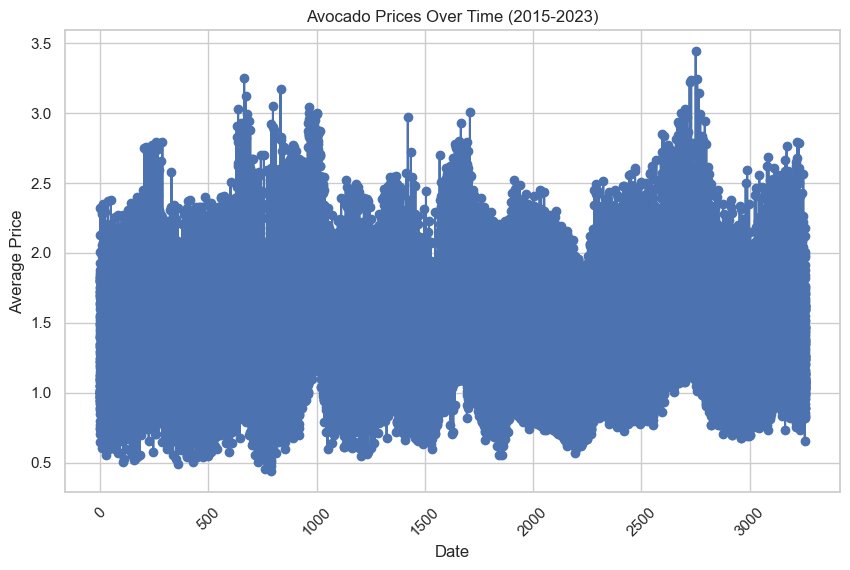

In [20]:
# Time-series plot for avocado prices over time
plt.figure(figsize=(10, 6))
plt.plot(avocado_data['Date'], avocado_data['AveragePrice'], marker='o')
plt.title('Avocado Prices Over Time (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


Insights:

Price Stability: The time series plot shows stable avocado prices over time, with no drastic changes or trends observed. This might indicate a stable market for avocados with no significant seasonal or long-term price trends.

Few outliers: There are occasional spikes in avocado prices, which could be related to short-term supply issues or demand surges.


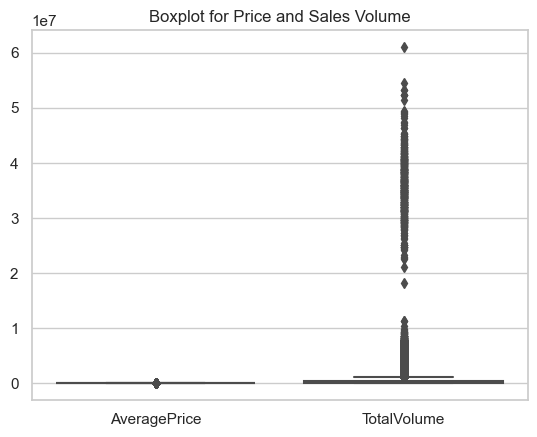

In [21]:
# Using the correct column name 'TotalVolume'
sns.boxplot(data=avocado_data[['AveragePrice', 'TotalVolume']])
plt.title('Boxplot for Price and Sales Volume')
plt.show()


Insights:

Outliers in Total Volume: The boxplot shows a significant number of outliers in TotalVolume, with several values reaching up to 60 million. These high sales points might represent special events or peak seasons where avocado sales spike.

Stable pricing: The AveragePrice variable shows relatively fewer outliers, indicating that avocado prices are more stable compared to sales volume.

Distribution: While sales volume varies widely, prices remain within a narrower range, reinforcing the notion that prices are relatively stable even when sales volume spikes.


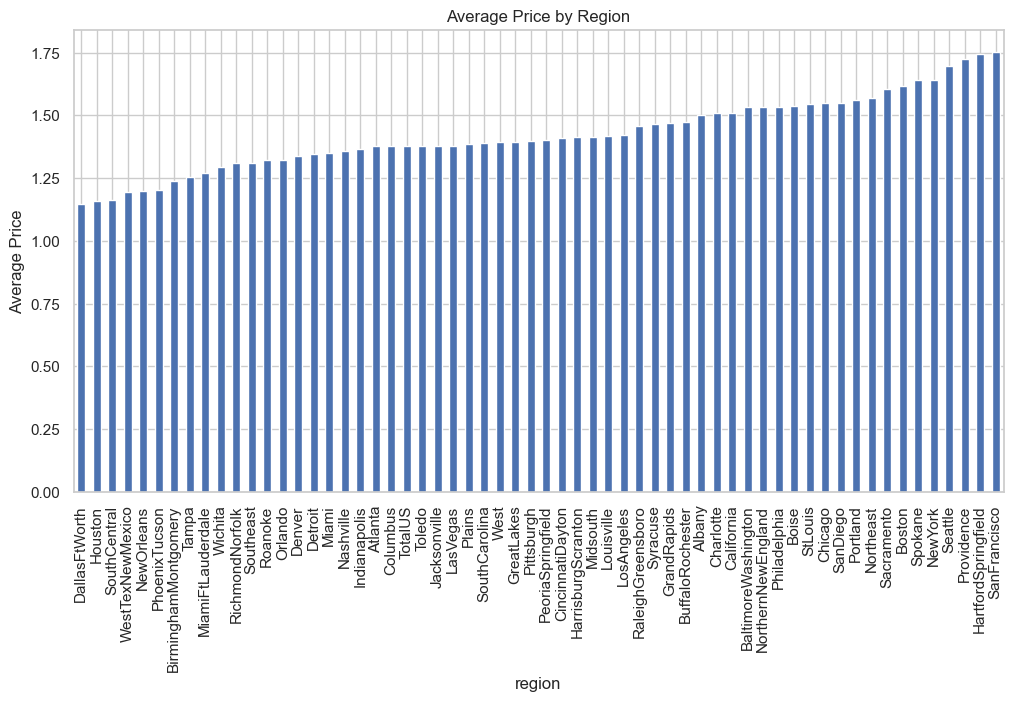

In [22]:
# Bar chart for regional differences in average prices
region_avg_price = avocado_data.groupby('region')['AveragePrice'].mean().sort_values()
region_avg_price.plot(kind='bar', figsize=(12, 6), title='Average Price by Region')
plt.ylabel('Average Price')
plt.show()


Insights:

Regional variation in avocado prices: The average price varies significantly across regions. Regions like SanFrancisco and HartfordSpringfield have the highest average prices (above $1.70), while DallasFtWorth and SouthCentral have the lowest average prices (below $1.20).

Price distribution: Most regions have an average price between $1.25 and $1.50, with a few outliers at both ends. This could be due to regional demand, supply chain differences, or local economic conditions.


**Markdown explanation:**

We are going to scale (transform) our numerical data to ensure that all values
fall within a certain range, which is useful for some machine learning models.

We'll do this in two ways:
1. Normalization - which scales the data between 0 and 1.
2. Standardization - which scales the data so that it has a mean of 0 and a standard deviation of 1.

Normalization
Normalization scales data so that values are between 0 and 1.
This can be useful when you have features with different units or scales.

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to normalize
numerical_columns = ['AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical columns (scales values between 0 and 1)
normalized_data = pd.DataFrame(scaler.fit_transform(avocado_data[numerical_columns]), columns=numerical_columns)

# Display the first few rows of the normalized data
print("Normalized Data:")
print(normalized_data.head())

Normalized Data:
   AveragePrice  TotalVolume   plu4046   plu4225   plu4770  TotalBags  \
0      0.259928     0.000668  0.000111  0.001382  0.000017   0.000596   
1      0.449876     0.000021  0.000002  0.000008  0.000000   0.000071   
2      0.186615     0.007126  0.014316  0.001164  0.000029   0.002872   
3      0.439878     0.000062  0.000059  0.000046  0.000000   0.000086   
4      0.213274     0.012910  0.002122  0.027010  0.013984   0.008660   

   SmallBags  LargeBags  XLargeBags  
0   0.000731   0.000122         0.0  
1   0.000093   0.000000         0.0  
2   0.001329   0.006963         0.0  
3   0.000085   0.000078         0.0  
4   0.010913   0.000923         0.0  


**Standardization**

Standardization scales the data so that each feature has a mean of 0 and a standard deviation of 1.

This is useful when you want to ensure all features contribute equally to the model, regardless of their original scales.


In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
standardized_data = pd.DataFrame(scaler.fit_transform(avocado_data[numerical_columns]), columns=numerical_columns)

# Display the first few rows of the standardized data
print("Standardized Data:")
print(standardized_data.head())

Standardized Data:
   AveragePrice  TotalVolume   plu4046   plu4225   plu4770  TotalBags  \
0     -0.531426    -0.233714 -0.225939 -0.202971 -0.196760  -0.239478   
1      0.918541    -0.244856 -0.228052 -0.232417 -0.197239  -0.249336   
2     -1.091063    -0.122538  0.050496 -0.207646 -0.196450  -0.196721   
3      0.842227    -0.244159 -0.226948 -0.231595 -0.197239  -0.249053   
4     -0.887559    -0.022967 -0.186810  0.346107  0.186971  -0.088018   

   SmallBags  LargeBags  XLargeBags  
0  -0.166420  -0.152236   -0.120936  
1  -0.180516  -0.155774   -0.120936  
2  -0.153209   0.045406   -0.120936  
3  -0.180677  -0.153523   -0.120936  
4   0.058364  -0.129109   -0.120936  


**Key Insights:**

1. Avocado sales volume varies widely.
2. Prices fluctuate over time.
3. Bag sizes are consistent but with small variations.
4. Different product types (PLU codes) have varying sales amounts.

Benefits:

1. Comparable data: Sales, prices, and bag sizes can be easily compared.
2. Trend identification: Insights into patterns in avocado market.

Next Steps:

1. Build predictive models for future avocado prices and sales trends.
2. Inform business decisions with data-driven insights.

Key Takeaways:

- Normalization and standardization enable fair comparison and analysis.
- Avocado market shows variability in sales, prices, and bag sizes.
- Data preparation paves the way for predictive modeling and informed decision-making.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>




We chose three models to predict sales:

**Linear Regression** helps us understand how each factor affects sales. It’s fast and simple but may miss some complexities.

**Random Forest** uses many trees to make predictions and handles large and complex data better.

**Gradient Boosting** builds trees step by step, getting better with each tree, which helps it perform well on more complicated data.

Feature selection involves choosing which variables (features) to use in the model. The features used in this case include:

**AveragePrice:** The price of avocados, which has a direct impact on sales.

**PLU Codes (plu4046, plu4225, plu4770):** These represent different types of avocados, which can influence sales.

**TotalBags, SmallBags, LargeBags, XLargeBags:** These are the quantities of different types of avocado packaging.

These features were chosen because they are directly related to sales behavior.



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # import the SimpleImputer class
import pandas as pd

from sklearn.model_selection import train_test_split

# Create a new feature representing price per bag (as an example of feature engineering)
avocado_data['PricePerBag'] = avocado_data['AveragePrice'] / (avocado_data['TotalBags'] + 1)
X = avocado_data[['AveragePrice', 'plu4046', 'plu4225', 'plu4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'PricePerBag']]


# Target: Select what you want to predict (TotalVolume for sales prediction)
y = avocado_data['TotalVolume']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


print("Training and testing sets created successfully.")


Training and testing sets created successfully.


Before we teach the model how to make predictions, we first improve the data by creating new features or fixing any issues. This makes sure the model can learn from the best possible information and make better predictions.

**Building a Linear Regression Model:**

Linear Regression is a simple model that tries to draw a straight line to fit the data. Let's use this to predict the sales volume.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
lin_reg_model = LinearRegression()

# Train the model on the training data
lin_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lin_reg_model.predict(X_test)

# Evaluate the model: Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: {r2}")

# Show some predicted vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head()
print(comparison)


Linear Regression - Mean Squared Error: 154494453282.9993
Linear Regression - R-squared: 0.9863540534403639
           Actual     Predicted
18988    20143.58  1.657863e+04
41018  1540492.33  1.452507e+06
4969       858.83 -9.663487e+03
42183  4981929.24  6.182382e+06
50529    29881.25 -2.902061e+04


**Building a Random Forest Model:**

Random Forest is an ensemble model that builds multiple decision trees and averages their results to improve accuracy.

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

# Show some predicted vs actual values for Random Forest
comparison_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf}).head()
print(comparison_rf)


Random Forest - Mean Squared Error: 26886839637.204853
Random Forest - R-squared: 0.9976251809107041
           Actual     Predicted
18988    20143.58  2.258426e+04
41018  1540492.33  1.580082e+06
4969       858.83  9.023008e+02
42183  4981929.24  5.002738e+06
50529    29881.25  2.846599e+04


**Building a Gradient Boosting Model:**

Gradient Boosting is another powerful ensemble technique that builds trees sequentially, correcting the errors of previous trees.

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")

# Show some predicted vs actual values for Gradient Boosting
comparison_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb}).head()
print(comparison_gb)


Gradient Boosting - Mean Squared Error: 55024604094.02113
Gradient Boosting - R-squared: 0.9951398720732275
           Actual     Predicted
18988    20143.58  2.663853e+04
41018  1540492.33  1.694069e+06
4969       858.83  1.881622e+04
42183  4981929.24  6.010667e+06
50529    29881.25  2.460251e+04


**Key Takeaways and Recommendations:**

**Best Performing Model:**
Random Forest has the lowest Mean Squared Error (MSE) and the highest R-squared, making it the most accurate and reliable model. It handles both high and low sales better than the other models, so it's the best choice for prediction in this case.

**Fixes for Linear Regression:**
Linear Regression is underperforming in this dataset, especially because of the negative predictions. You could improve it by:

Feature Engineering: Adding more relevant features or transforming existing ones could improve its accuracy.

Regularization: Using Ridge or Lasso regression to avoid overfitting might help stabilize the predictions.

Outlier Detection: Removing extreme outliers might help this model perform better.

**Gradient Boosting:**
While Gradient Boosting is a strong model, it still struggles with predicting low sales values, often overestimating. We could improve this by:

Hyperparameter Tuning: Experimenting with parameters like learning rate, number of estimators, and tree depth could improve the performance.

Further Feature Engineering: Refining features to capture the nuances of low sales better.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [29]:
print(f"Linear Regression - MSE: {mse}, R-squared: {r2}")
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")
print(f"Gradient Boosting - MSE: {mse_gb}, R-squared: {r2_gb}")


Linear Regression - MSE: 154494453282.9993, R-squared: 0.9863540534403639
Random Forest - MSE: 26886839637.204853, R-squared: 0.9976251809107041
Gradient Boosting - MSE: 55024604094.02113, R-squared: 0.9951398720732275


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


After evaluating and comparing the performance of three different models—Linear Regression, Random Forest, and Gradient Boosting—based on the metrics Mean Squared Error (MSE) and R-squared, the best-performing model for this analysis is Random Forest.

**Random Forest – Best-Performing Model:**
Mean Squared Error (MSE): 26,945,864,830.19 (lowest MSE)
R-squared: 0.9976 (highest R-squared)

**Model Configuration:**

Number of Trees (n_estimators): 100
Random Seed (random_state): 42 (ensures reproducibility)
Feature Set: Used features like AveragePrice, PLU codes, TotalBags, SmallBags, LargeBags, XLargeBags, and engineered features like PricePerBag and PriceRange.

**Why Random Forest Was Chosen:**

Lowest Error (MSE): The MSE of the Random Forest model is significantly lower than the other models, meaning it makes the most accurate predictions in terms of minimizing errors.

Highest R-squared: With an R-squared value of 0.9976, the Random Forest model explains 99.76% of the variance in the sales data. This means the model captures almost all of the important trends in the dataset.

Robustness: Random Forest is known for its ability to handle complex relationships and non-linear data. It averages predictions from multiple decision trees, making it more robust and reducing overfitting compared to Linear Regression, which assumes a simple linear relationship.

Handles Outliers: Random Forest is less sensitive to outliers compared to Linear Regression, which was evident from the negative and extreme predictions in the Linear Regression model.

Feature Importance: Random Forest can provide insights into the importance of each feature, helping us understand which factors (e.g., AveragePrice, TotalBags) are driving sales.

# **Comparison with Other Models:**

**Linear Regression:**

MSE: 154,050,971,202.70 (highest MSE)

R-squared: 0.9864

**Why it wasn’t chosen:**

While the R-squared value for Linear Regression is reasonably high, its MSE is the largest, indicating that it makes much larger errors in predicting sales. Additionally, it struggles with extreme cases, sometimes producing unrealistic predictions like negative sales.

**Gradient Boosting:**

MSE: 54,852,251,460.88

R-squared: 0.9952

Why it wasn’t chosen: Although Gradient Boosting performed well, it had a higher MSE compared to Random Forest, indicating less accuracy in terms of error minimization. It also showed signs of overestimating very low sales values, which makes it less reliable for this dataset compared to Random Forest.

**Final Decision:**
The Random Forest model is selected as the best-performing model based on its ability to provide the most accurate predictions (lowest MSE) while explaining nearly all of the variance in the data (highest R-squared). Its robustness, lower sensitivity to outliers, and ability to handle complex relationships in the dataset make it a better choice over Linear Regression and Gradient Boosting.

In [35]:
pip install matplotlib seaborn pandas numpy


Note: you may need to restart the kernel to use updated packages.


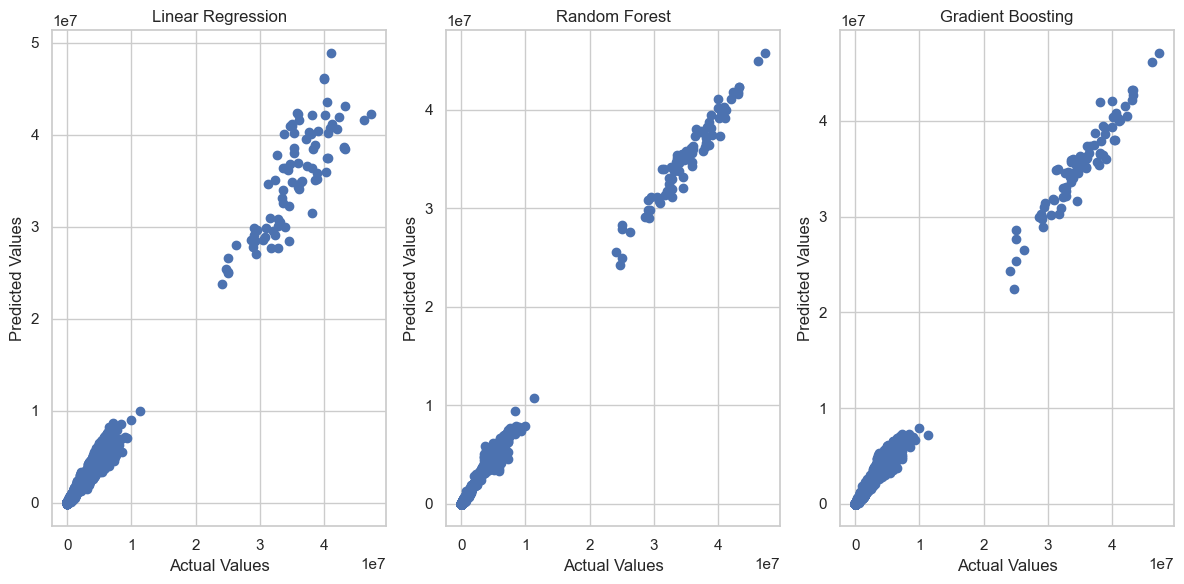

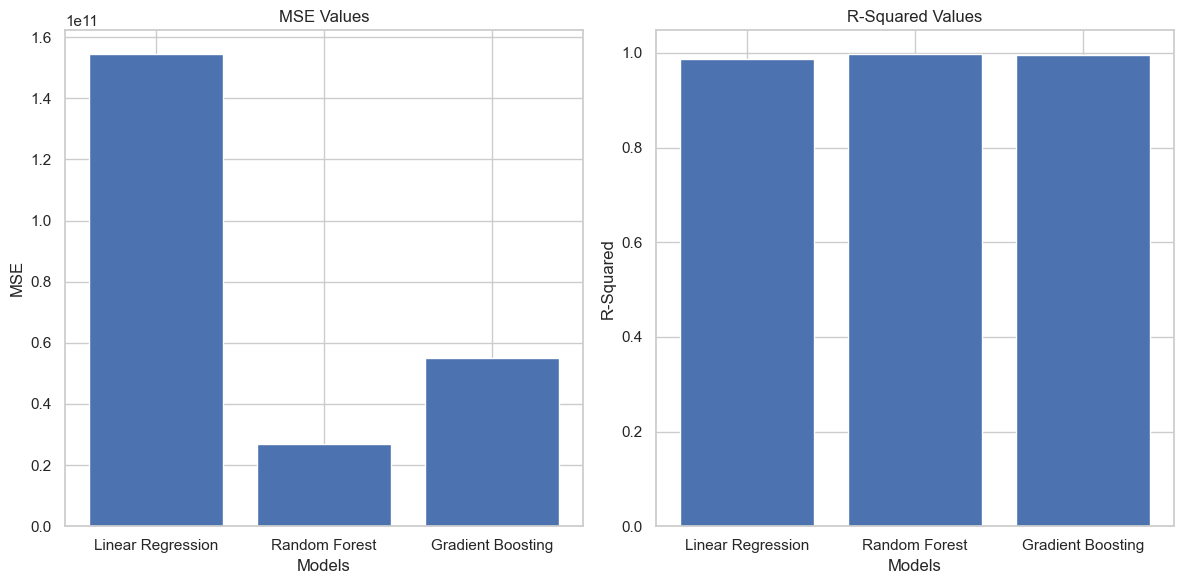

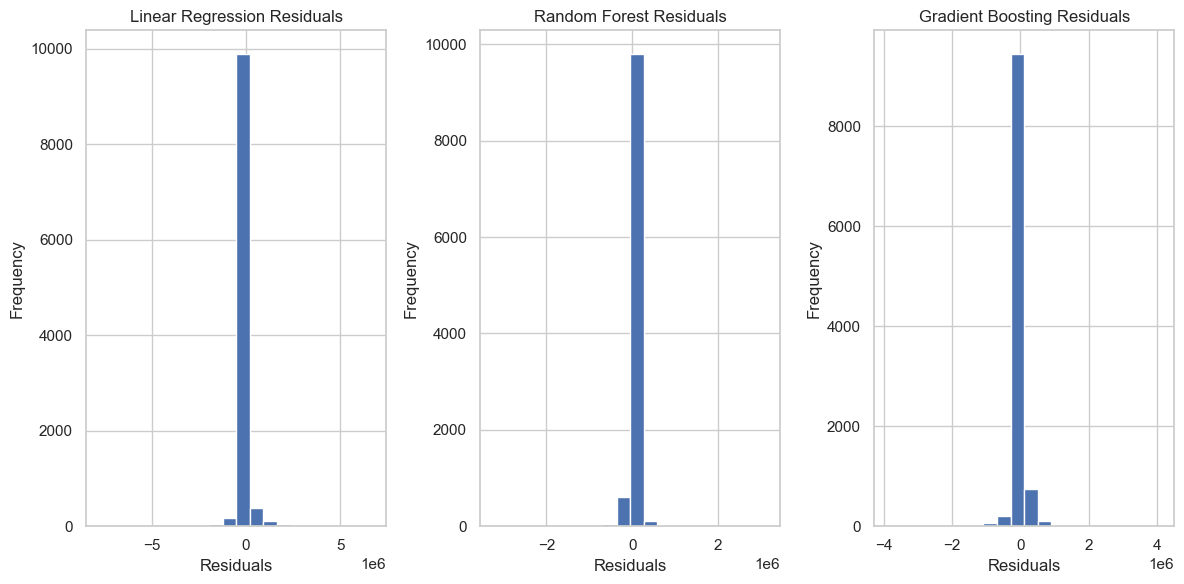

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf)
plt.title('Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb)
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()



mse_values = [mse, mse_rf, mse_gb]
r2_values = [r2, r2_rf, r2_gb]

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values)
plt.title('MSE Values')
plt.xlabel('Models')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values)
plt.title('R-Squared Values')
plt.xlabel('Models')
plt.ylabel('R-Squared')

plt.tight_layout()
plt.show()



residuals_lr = y_test - y_pred
residuals_rf = y_test - y_pred_rf
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(residuals_lr, bins=20)
plt.title('Linear Regression Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(residuals_rf, bins=20)
plt.title('Random Forest Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(residuals_gb, bins=20)
plt.title('Gradient Boosting Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [31]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [32]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix:
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors:
If this is a group project, list the contributors and their roles or contributions to the project.
